In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bernouli_sample(p):
    while True:
        proba = np.random.rand(p)
        values = (proba < 0.5).astype(int) * 2 - 1
        yield values

def approx_gradient(loss, perturb, theta, c):
    # SPSA
    diff = loss(theta + c * perturb) - loss(theta - c * perturb)
    return (diff / 2 * c) / perturb

def grad_step(theta, a, grad):
    return theta - a * grad

$$
L(\theta) = \sum i t_i + \prod t_i^{-1}
$$

$$
\frac{\partial L}{\partial t_i} = i - t_i ^{-1} \prod t_j^{-1}
$$

$$
\frac{\partial^2 L}{\partial t_i^2} = 2 t_i ^{-2} \prod t_j^{-1}
$$

In [26]:
def grad_7p14(theta):
    # prod tj^-1 either way
    prod_part = np.prod(1/theta)
    return np.arange(1, len(theta) + 1) - prod_part/theta

def hess_7p14(theta):
    prod_part = np.prod(1/theta)
    return 2 * prod_part / (theta **2)

In [8]:
def loss_7p14(theta):
    return theta @ np.arange(1, len(theta) + 1) + np.prod(1/theta)

P = 10
theta_0 = np.ones(P)
a0 = 1
c0 = 0.02

theta = theta_0
losses = []
for perturb, i in zip(bernouli_sample(P), range(100_000)):
    a = a0
    c = c0
    if i > 10000:
        c = c0 / 2
    if i > 30000:
        a = a0 / 2
    if i > 40000:
        c /= 2
    loss = loss_7p14(theta)
    if i % 10000 == 0:
        print(f"{i}: {loss}")
    grad = approx_gradient(loss_7p14, perturb, theta, c)
    theta = grad_step(theta, a, grad)
    losses.append(loss)



0: 56.0
10000: 43.463443004418565
20000: 43.444692378936665
30000: 43.43532621280206
40000: 43.4324923085177
50000: 43.43190191007094
60000: 43.431365720964074
70000: 43.43087016428675
80000: 43.4304117247048
90000: 43.42998736147211


In [9]:
theta

array([3.75978368, 1.98698617, 1.32277757, 0.99164225, 0.79331819,
       0.6610265 , 0.56663109, 0.4957933 , 0.44065127, 0.39659658])

In [12]:
grad_7p14(theta)

array([-0.05420792,  0.00522329,  0.00358259,  0.00300035,  0.00377808,
        0.0038807 ,  0.0049836 ,  0.00555209,  0.00514614,  0.00598093])

In [34]:
theta_c = np.array(theta)
last_loss = loss_7p14(theta)
a0 = 0.1
a = a0
for i in range(1000):
    grad = grad_7p14(theta_c)
    hess = hess_7p14(theta_c)
    ht = grad / hess
    theta_cc = theta_c - .1 * ht
    loss_diff = last_loss - loss_7p14(theta_cc)
    if a < 1e-9:
        print("Found bottom I think?")
        break
    if loss_diff <= 0:
        a /= 2
        continue
    a = a0
    theta_c = theta_cc
    last_loss = loss_7p14(theta_c)
    if i % 200 == 0:
        print(loss_7p14(theta_c))    
        print(" ".join([np.format_float_positional(ti, 3) for ti in theta_c]))

43.42908853479632
3.769 1.987 1.323 0.992 0.793 0.661 0.567 0.496 0.441 0.397
43.42449524834137
3.948 1.974 1.316 0.987 0.79 0.658 0.564 0.493 0.439 0.395
Found bottom I think?


In [35]:
theta_c

array([3.94768074, 1.97384074, 1.31589382, 0.98692036, 0.78953629,
       0.65794691, 0.56395449, 0.49346018, 0.43863127, 0.39476815])

In [39]:
grad

array([-1.64096505e-07,  4.74313533e-08,  5.71312446e-08,  7.03192824e-08,
        8.79902204e-08,  1.03435705e-07,  1.22178539e-07,  1.39159736e-07,
        1.52928713e-07,  1.70787770e-07])

In [38]:
loss_7p14(theta) - loss_7p14(theta_c)

0.005097361919347065

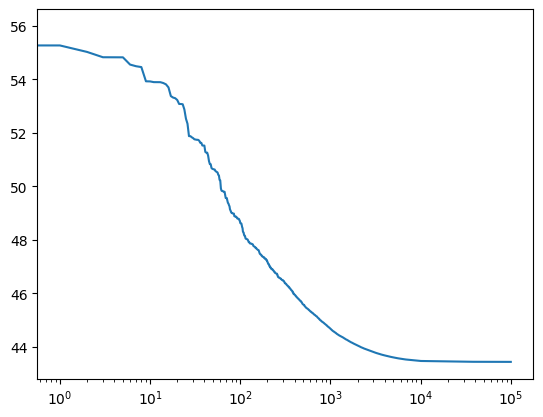

In [10]:
plt.plot(losses)
plt.xscale('log')